## Artists Exploratory Data Analysis

The `artist.csv` file contains artists data fetched from the playlists from `playlist_filtered.csv` data.

This notebook includes only:
- Removal of collaborators and other non-bolivian artists.
- Exploration of genres.

The **Complete Exploratory Analysis** can be found in `Capstone-Project.ipynb` notebook in the root folder of this project. Where a full analysis is provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('artists_raw.csv')
df = df.reset_index(drop=True)
df.shape

(289, 6)

In [3]:
df.head(10)

,artist_id,name,popularity,followers,genres,img_url
0,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,914515,[],https://i.scdn.co/image/8987540724d78afbf9f924...
1,5ZAR5Usb11xw4KENbEE8uZ,Agua Marina,61,524619,['cumbia peruana'],https://i.scdn.co/image/d6e0f3f82d5d242d7cfbdf...
2,43qxAkuKFB6fMNSeS5dO7Z,Ana Bárbara,67,511934,"['grupera', 'latin', 'mexican pop', 'ranchera']",https://i.scdn.co/image/510721a7c53cf6851c8c49...
3,5xwugJ4uudppmOCCZateE5,Liberación,67,492297,"['banda', 'cumbia', 'grupera', 'gruperas inmor...",https://i.scdn.co/image/3dae94769c5b4b0bd373a3...
4,6pVmT18pd1QaofDegZUEKX,La Nueva Luna,63,355539,"['argentine rock', 'cumbia pop', 'cumbia ville...",https://i.scdn.co/image/1afe01e330becd1e9d72b1...
5,1bwsprbGyKx2vBbPAwVebl,Noche de Brujas,60,329957,"['cumbia chilena', 'cumbia ranchera']",https://i.scdn.co/image/f74da5451379ec47ceef20...
6,0CBKUzrf6yGdTgxAQbUUHS,Rafaga,64,328990,"['cumbia chilena', 'cumbia villera']",https://i.scdn.co/image/23db8a49d3f66a1499d7aa...
7,3NLDQVyI2LVtQFJt8JeAAx,Guardianes Del Amor,59,307276,"['cumbia', 'cumbia sonidera', 'duranguense', '...",https://i.scdn.co/image/b3c4281ef776ba58fa74c1...
8,1GlOpg3dPUft550esb82K3,Chaqueño Palavecino,61,260066,"['chamame', 'cumbia villera', 'folclore salten...",https://i.scdn.co/image/5b11e684db703caddbdd97...
9,6fBjnfeYEU3VFuQl8RPrp8,Samuray,59,226354,"['banda', 'cumbia', 'cumbia sonidera', 'durang...",https://i.scdn.co/image/b46778ab868535cd749f2a...


### Remove duplicates

In [4]:
duplicates = df[df.duplicated('name')].sort_values('name')
duplicates

,artist_id,name,popularity,followers,genres,img_url
145,3AZ0RKW5CVI2uD6Mr3ZLcD,America Pop,1,1025,['cumbia boliviana'],NaN
154,4bIAgnT0lu5DEyW5wjKhQr,Andesur,0,862,['salay'],NaN
268,5HSw372vFrMzaMKcPP0XZI,Miguel Angel ElGenio,14,19,[],https://i.scdn.co/image/ab67616d0000b273819529...
265,731CL04Ihoz7ALgmzdb7OG,Zckrap,4,21,[],https://i.scdn.co/image/ab67616d0000b27339ea7a...


In [5]:
df = df.drop_duplicates(subset='name', keep='first')
df.shape

(285, 6)

### Remove non-Bolivian artists
All artists including substring of other countres in genere.

In [6]:
internationals = df[df.genres.str.contains('argentin|chile|colombia|mexic|peru|uruguay')]
df = df[~df.artist_id.isin(internationals.artist_id)]
print("Internationals", internationals.shape)
internationals[['name', 'genres']]

Internationals (30, 6)


,name,genres
1,Agua Marina,['cumbia peruana']
2,Ana Bárbara,"['grupera', 'latin', 'mexican pop', 'ranchera']"
3,Liberación,"['banda', 'cumbia', 'grupera', 'gruperas inmor..."
4,La Nueva Luna,"['argentine rock', 'cumbia pop', 'cumbia ville..."
5,Noche de Brujas,"['cumbia chilena', 'cumbia ranchera']"
6,Rafaga,"['cumbia chilena', 'cumbia villera']"
7,Guardianes Del Amor,"['cumbia', 'cumbia sonidera', 'duranguense', '..."
8,Chaqueño Palavecino,"['chamame', 'cumbia villera', 'folclore salten..."
9,Samuray,"['banda', 'cumbia', 'cumbia sonidera', 'durang..."
10,Maniako,['mexican hip hop']


In [7]:
df.head(5)

,artist_id,name,popularity,followers,genres,img_url
0,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,914515,[],https://i.scdn.co/image/8987540724d78afbf9f924...
14,4cCVNFShP38zaKGuo8QSMN,Inti-Illimani,53,168565,"['andean', 'latin rock', 'nueva cancion', 'tro...",https://i.scdn.co/image/bad9b1ff18d94a04cf5146...
15,6gWVXK2R7WYXTqxULGAyfx,Illapu,59,164943,"['andean', 'latin rock', 'nueva cancion']",https://i.scdn.co/image/0d3471ea94cefb7e6c029b...
17,58LNn3iNPmmHusH1EkyBm4,Maria Dolores Pradera,55,136796,"['bolero', 'cancion melodica', 'cantautor', 'f...",https://i.scdn.co/image/ff22f4dabc93f99c7f4a5f...
18,37zUz0gjTaNCWTOymnuWGG,Jambao,56,134946,"['cuarteto', 'cumbia villera']",https://i.scdn.co/image/e9fcf1dfc4b501f2a25210...


## Manually excluded
Elements in the excluded files cointain artists from other countries and duplicates (with non equal) and other irrelevants.

In [8]:
excluded_artists = pd.read_csv('artists_excluded.csv')
excluded_artists.shape

(37, 5)

In [9]:
    df = df[~df.artist_id.isin(excluded_artists.artist_id)]
df.shape

(219, 6)

In [10]:
df.iloc[range(50)]

,artist_id,name,popularity,followers,genres,img_url
21,0tkboyBYNymYytYlb9EXkN,Los Kjarkas,56,97402,"['andean', 'charango', 'folklore boliviano']",https://i.scdn.co/image/79cf21eb7afee7040e0bc3...
29,30DQw23SjsbMLFlhia84jN,Elias Ayaviri,48,47402,['hip hop boliviano'],https://i.scdn.co/image/d031b0c224b238177d54b1...
32,2oM7LqPaoCUcHHHnsTtgn1,Bonny Lovy,47,35370,"['cumbia boliviana', 'pop reggaeton']",https://i.scdn.co/image/782b72dd80898104191c44...
35,0hkFv9719WLJ2uupZTn0ru,Savia Andina,44,27832,"['andean', 'folklore boliviano']",https://i.scdn.co/image/2aa0046a50d2b0a7fb1412...
39,119DPASXtwEkIiAoRSOUR8,Proyección,43,19842,"['andean', 'folklore boliviano']",https://i.scdn.co/image/ab67616d0000b273b9306d...
43,7icDj3mEmk3X2phthD7iA2,Matamba,38,18070,"['bolivian rock', 'reggae en espanol']",https://i.scdn.co/image/0da37fc535fec8c6e731ca...
44,0SWtMcmZLgP04Kj5x0eCxa,azul azul,50,16384,['latin pop'],https://i.scdn.co/image/368c867ee65a75b5b5a052...
46,0vvNxX8NjBqBZeJk4Ni3xc,Kala Marka,39,15423,['andean'],https://i.scdn.co/image/ab67616d0000b27360d4a9...
47,1IYPsxunWpJvDYA1Por8dI,Diego Ríos,41,15345,['cumbia boliviana'],https://i.scdn.co/image/2136977d295eebc7f071fa...
48,1pbcskpK1qePXm3sYvYu4o,Chila Jatun,42,15051,['andean'],https://i.scdn.co/image/dcfe2ab49d0de0c8a4cd3f...


## Exploratory Data Analysis

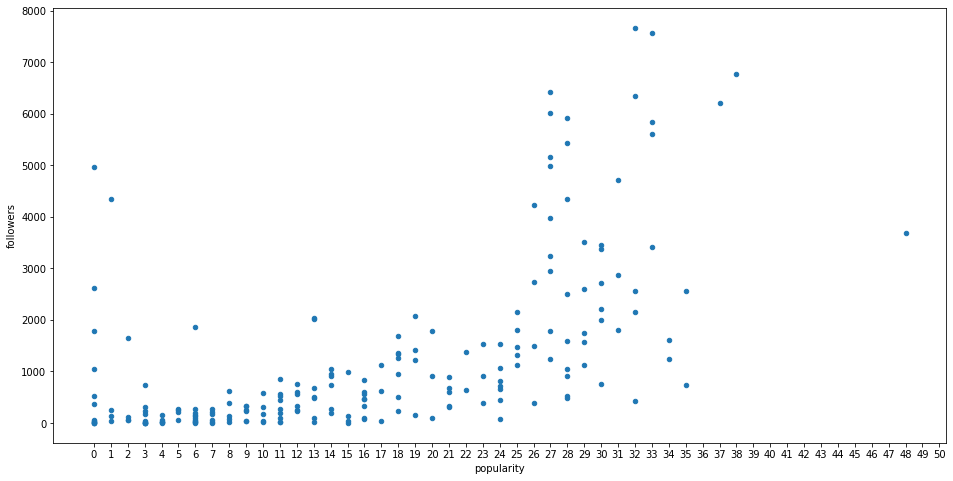

In [11]:
# Zoomed Popularity vs Followers
followers_limit = 8000
zoomed_data = (df.followers <= followers_limit)
ax = df[zoomed_data].plot.scatter(x='popularity', y='followers', figsize=(16,8))
plt.xticks(range(51), range(51));

## Genres

In [12]:
df.genres.value_counts()

[]                                                  53
['bolivian rock']                                   32
['cumbia boliviana']                                29
['folklore boliviano']                              25
['andean']                                          15
['salay']                                           15
['indie boliviano']                                 11
['andean', 'folklore boliviano']                    10
['bolivian rock', 'indie boliviano']                 7
['andean', 'charango']                               4
['charango']                                         3
['andean', 'charango', 'folklore boliviano']         2
['andean', 'folklore boliviano', 'latintronica']     1
['andean', 'folklore boliviano', 'huayno']           1
['hip hop boliviano']                                1
['chamame']                                          1
['bolivian metal', 'latin metal']                    1
['andean flute']                                     1
['latin po

In [13]:
from ast import literal_eval
df.genres = df.genres.apply(literal_eval)

In [14]:
no_genre = df[df.genres.apply(len) == 0]
no_genre

,artist_id,name,popularity,followers,genres,img_url
103,4DJ8AcSZKLky2Nckx8pTWV,Mc J Rap,32,2153,[],https://i.scdn.co/image/0884cbcd60a46bf5e414d7...
136,3JfbO4rk0FLKe1zIiTgWAr,Andesur,34,1239,[],https://i.scdn.co/image/95487d562519a5f0aa9655...
144,5ifRgTaaAXxScj0lxS7wHK,Erick Claros,0,1046,[],NaN
158,7yE1onzMbRs2x0PJtZ667p,Antares,30,762,[],https://i.scdn.co/image/ab67616d0000b273dbbd6d...
160,5kTdznt6MSAyjRzHrsw9GQ,Zckrap,35,745,[],https://i.scdn.co/image/ab67616d0000b27314d815...
161,7rT2dg18W622J4n6jYcquY,Bolivia Band,14,735,[],https://i.scdn.co/image/ab67616d0000b2730ac7c2...
169,4otpYgHGWGKhfghlCo8bBh,Banda Intercontinental Poopó,17,627,[],https://i.scdn.co/image/ab67616d0000b273927aa6...
170,7nGJIrYTEJHOMex1dZG3o9,Illapa Reggae,8,613,[],https://i.scdn.co/image/ab67616d0000b27391fd1e...
172,5ZvwK0ZabdNTC4CB4TeqSc,Bolivia,16,600,[],https://i.scdn.co/image/ab67616d0000b273c31b35...
190,0S7MwI5YpZTkhA5aiDm0uM,Jordan,32,420,[],https://i.scdn.co/image/1523eeb8012054f89c9503...


In [15]:
assignments = [{
    'genre': 'folklore boliviano',
    'names': ['Andesur', 'Canto Popular', 'Antares', 'Bolivia', 'Banda Intercontinental Poopó']
}, {
    'genre': 'hip hop boliviano',
    'names': ['Mc J Rap', 'Zckrap', 'Erick Claros']
}, {
    'genre': 'latin pop',
    'names': ['Bolivia Band']
}, {
    'genre': 'reggae en espanol',
    'names': ['Illapa Reggae']
}]

df_copy = df.copy()
for assignment in assignments:
    genre = assignment['genre']
    names = assignment['names']
    to_modify = df_copy.name.isin(names)
    df_copy[to_modify].genres.apply(lambda genres: genres.append(genre))
df_copy.iloc[:-20]

,artist_id,name,popularity,followers,genres,img_url
21,0tkboyBYNymYytYlb9EXkN,Los Kjarkas,56,97402,"[andean, charango, folklore boliviano]",https://i.scdn.co/image/79cf21eb7afee7040e0bc3...
29,30DQw23SjsbMLFlhia84jN,Elias Ayaviri,48,47402,[hip hop boliviano],https://i.scdn.co/image/d031b0c224b238177d54b1...
32,2oM7LqPaoCUcHHHnsTtgn1,Bonny Lovy,47,35370,"[cumbia boliviana, pop reggaeton]",https://i.scdn.co/image/782b72dd80898104191c44...
35,0hkFv9719WLJ2uupZTn0ru,Savia Andina,44,27832,"[andean, folklore boliviano]",https://i.scdn.co/image/2aa0046a50d2b0a7fb1412...
39,119DPASXtwEkIiAoRSOUR8,Proyección,43,19842,"[andean, folklore boliviano]",https://i.scdn.co/image/ab67616d0000b273b9306d...
...,...,...,...,...,...,...
261,1IEdZMndnqIAabxVTbfO8B,Chuquiago,11,29,[],https://i.scdn.co/image/ab67616d0000b273cea9cc...
262,15yTzkgR4eoqBUzMrzOQX5,Grupo Lejania,11,29,[salay],https://i.scdn.co/image/ab67616d0000b273664990...
263,6bH2XgEcgrZqaG5HLfuNcZ,Anadda,4,28,[bolivian rock],https://i.scdn.co/image/ab67616d0000b273639b1a...
264,5cZuv449OspxPrjcVnLUrR,Gonzalo Hermosa González,7,26,[charango],https://i.scdn.co/image/ab67616d0000b273e9c573...
